# The Titans
# Commodity Price Forecasting using AI/ML

## <details><summary>What is Kalman Filter? </summary>  
The Kalman filter is an algorithm that uses noisy observations of a system over time to estimate the parameters of the system and predict future observations. Note that some of systems are unobservable. At each time step, it makes a prediction, takes in a measurement, and updates itself based on how the prediction and measurement compare.

## <details><summary> Why the price of coffee matters the economy of the growing countries?</summary>
    Coffee price is highly fluctuated and has significant effect on the economy and conducting a regirous research on forecasting coffee price has theoretical and practical importance. This study aims at forecasting the coffee price in Ethiopia. We used daily closed price data of Ethiopian coffee recorded in the period 25 June 2008 to 5 January 2017 obtained from Ethiopia commodity exchange (ECX) market to analyse coffee prices fluctuation. Here, the nature of coffee price is non-stationary and we apply the Kalman filtering algorithm on a single linear state space model to estimate and forecast an optimal value of coffee price. 

In [2]:
#importing the dataset
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from bokeh.plotting import figure, show, output_notebook
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error

In [3]:
#Preparing the DataFrame
%matplotlib inline

data=pd.read_csv("C:/Users/Administrator/Desktop/HackSprint-TheTitans/COFFEE.csv")
df=pd.DataFrame(data,columns=['Close','Date','High','Low','Open','Volume'])

#set the date as index

df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']

df = df.drop(columns = 'Date')
plt.style.use('ggplot')

In [4]:
print(df.shape)
df.head()

(2149, 5)


,Close,High,Low,Open,Volume
Date,,,,,
2017-01-05,20.540001,20.799999,20.340000,20.340000,179900
2017-01-04,20.209999,20.320000,20.059999,20.100000,276800
2017-01-03,19.610001,19.650000,19.020000,19.379999,290900
2016-12-30,19.559999,19.730000,19.340000,19.600000,225600
2016-12-29,19.290001,19.660000,18.980000,19.000000,283800


In [5]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### EDA(Exploratory Data Analusis)

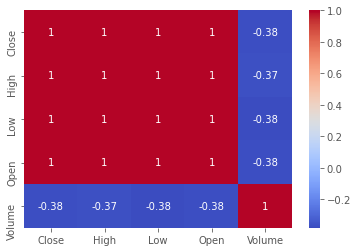

In [6]:
sns.heatmap(df.corr(),
            annot = True,
            cmap='coolwarm'
           )

### All the variables are highly correlated to each other, but the voluume.

## Visualising the Closing Prices of Coffee


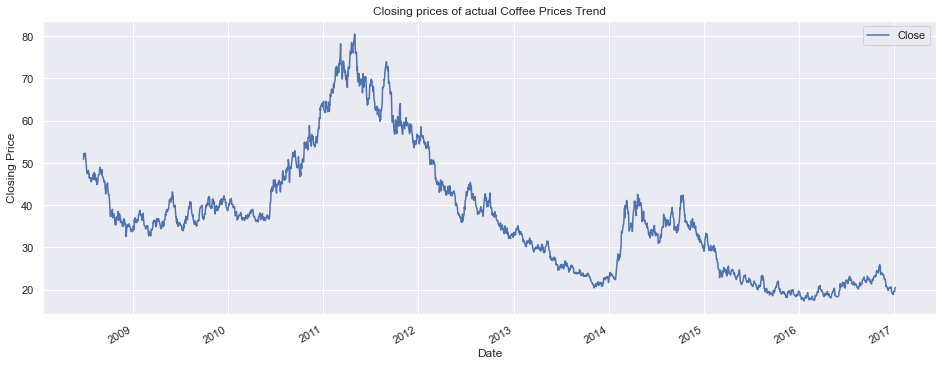

In [23]:
# Ploting the closing prices of coffee:(A time series data) that can also be visualize like this.
df["Close"].plot(
    figsize=(16,6),
    label = 'Close')
plt.ylabel('Closing Price')
plt.legend()
plt.title('Closing prices of actual Coffee Prices Trend')
plt.show()

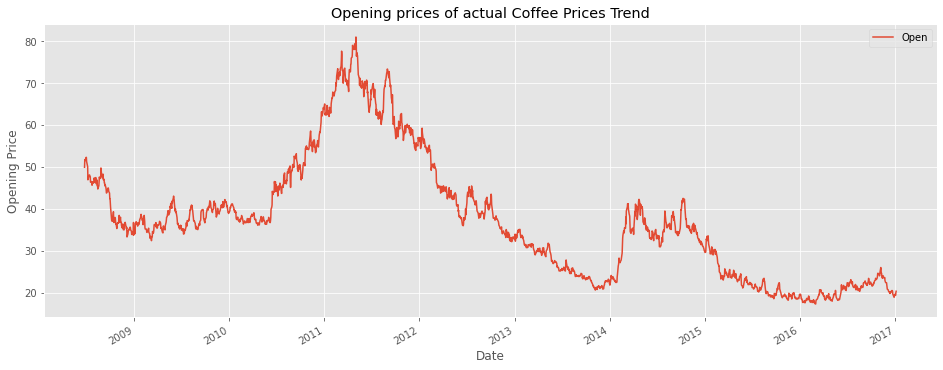

In [7]:
df["Open"].plot(
    figsize=(16,6),
    label = 'Open')
plt.ylabel('Opening Price')
plt.legend()
plt.title('Opening prices of actual Coffee Prices Trend')
plt.show()

Text(0.5, 0, 'Open')

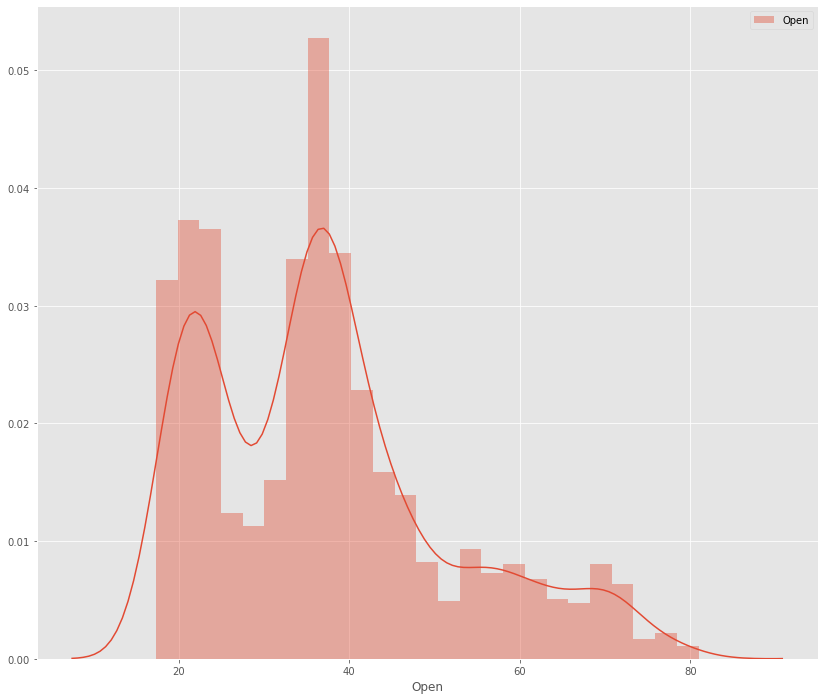

In [8]:
plt.figure(figsize = (14,12))
sns.distplot(df['Open'],
            bins =25,
            label = 'Open')
plt.legend()
plt.xlabel('Open')

### Applying Kalman Filtering Algorithm to Predict the Close Price of Coffee on Commodity Exchanges

In [9]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = df['Close'].values[0],
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [10]:
state_means,_ = kf.filter(df[['Close']].values)
state_means = pd.Series(state_means.flatten(), index=df.index)

In [11]:
#Defining the Mean Square Error

def RMSE(y,y_hat):
    difference = y-y_hat
    difference_square = difference**2
    mean_squared_difference = np.mean(difference_square)
    root_mean_squared_difference = np.sqrt(mean_squared_difference)
    return root_mean_squared_difference

In [12]:
print(df['Close'].values.mean())
RMSE(df['Close'], state_means)

37.17646813401581


1.7273988030311151

### Kalman Filtering Estimation Visualization

In [13]:
df["Date"] = pd.to_datetime(df.index)

mids = (df.Open + df.Close)/2
spans = abs(df.Close-df.Open)

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000 # half day in ms

output_notebook()

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="left",y_axis_label = "Price",
          x_axis_label = "Date")

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color='green', line_color="green")
p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color='red', line_color="red")
p.line(df.Date,state_means,line_width=1,line_color = 'blue',legend="Kalman filter")

#p.title("Implementation of Kalman Filter Estimation - TCS EOD chart")
p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha=0.3
 

Loading BokehJS ...

In [14]:
show(p)

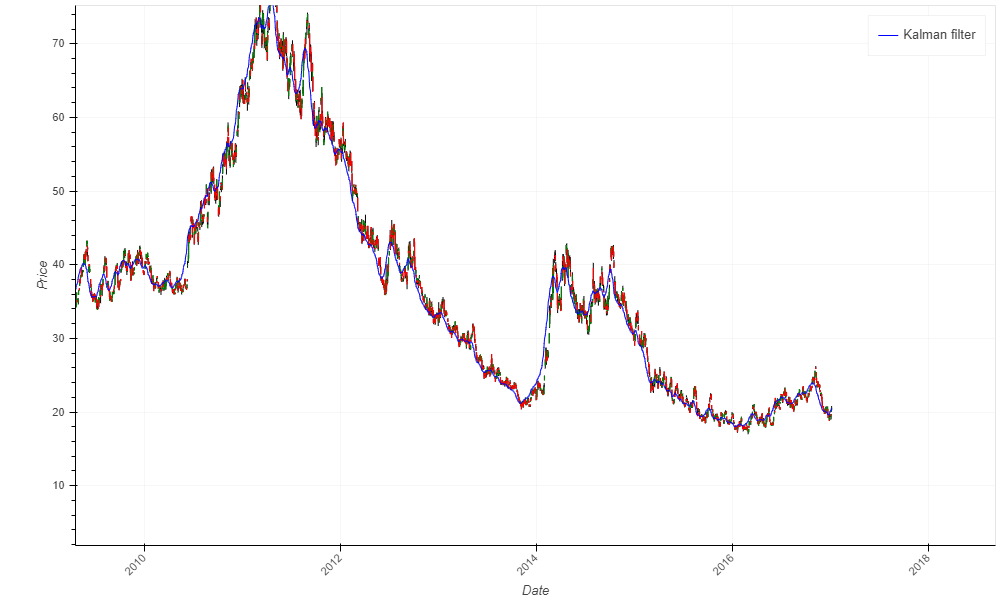

The performance of the algorithm for estimating and forecasting the coffee price is evaluated by using root mean square error (RMSE). Based on the linear state space model and the Kalman filtering algorithm, the root mean square error (RMSE) is 0.000016375, which is small enough, and it indicates that the algorithm performs well.

The Kalman Filter is a powerful tool for time series analysis and modeling, able to calculate difficult likelihoods of classical time series models and handle non-stationary models with exogenous control inputs. Note that the free open-source implementation of the Kalman Filter makes sufficiently flexible for both statistical and engineering purposes, in statsmodels.

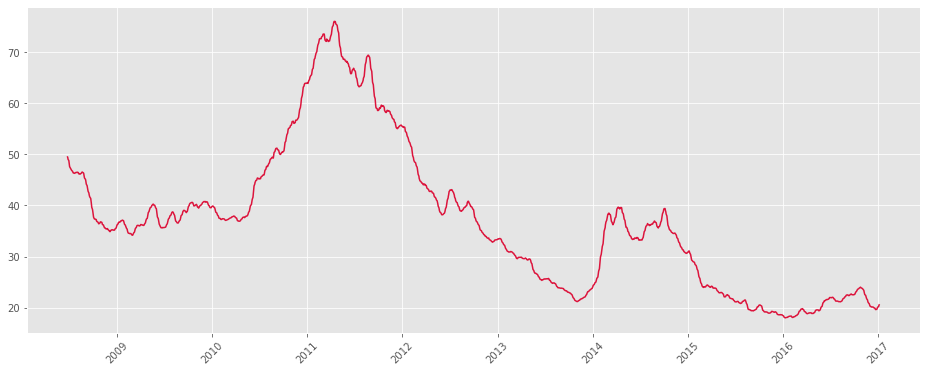

In [15]:
#The Predicted values
plt.figure(figsize = (16,6))
plt.plot(state_means, color ='crimson')
plt.xticks(rotation = 45)
plt.show()

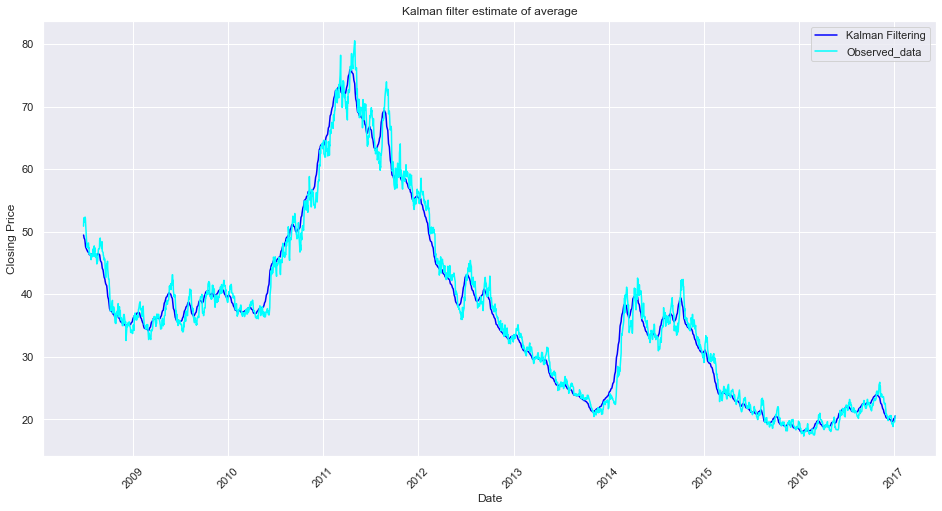

In [16]:
sns.set()
plt.figure(figsize=(16,8))
#colors = ['#2300A8', '#00A658']
plt.plot(df.Date,state_means,color='blue')
plt.plot(df.Date,df["Close"],color='cyan')
plt.legend(['Kalman Filtering','Observed_data'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Kalman filter estimate of average')
plt.xticks(rotation = 45)
plt.show()

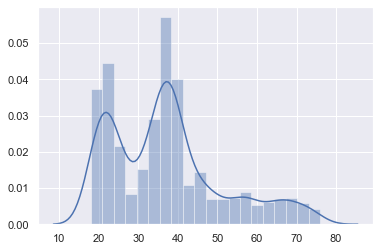

In [17]:
sns.distplot(state_means.values)

In [18]:
print("Actual  |  Predicted Values")
for i in range(0,20):
    print(df['Close'][i], end = "       ")
    print(state_means[i])

Actual  |  Predicted Values
20.540001       20.540001
20.209999       20.428543370860925
19.610001       20.21734166139256
19.559998999999998       20.07839915957832
19.290001       19.935504144669515
18.860001       19.762838866515665
19.17       19.676464521776342
19.27       19.621705350247023
19.719998999999998       19.63413206968474
20.57       19.74648028417165
20.469998999999998       19.82974362733693
20.620001000000002       19.91760064896817
20.360001       19.965414720402507
20.389999       20.010254474560607
20.549999       20.066187274059633
20.48       20.1084103667971
20.4       20.137787195392193
19.809998999999998       20.105105038545883
20.17       20.111520534519386
20.290001       20.12904243455641


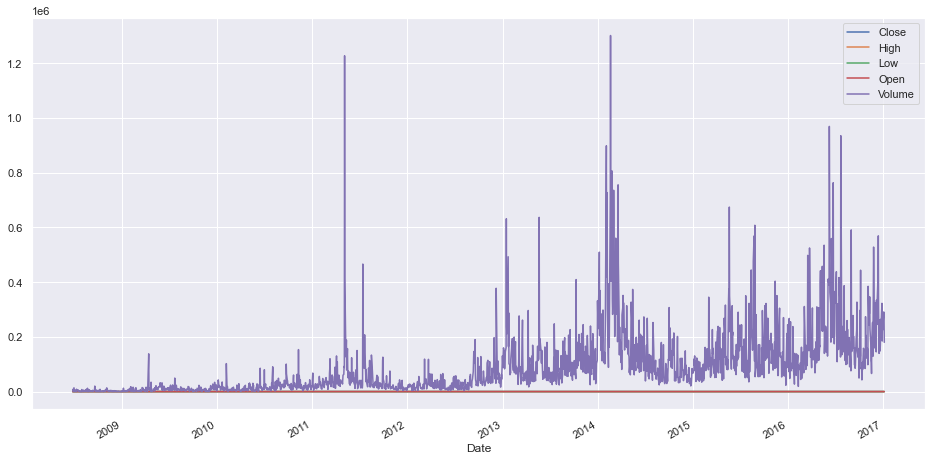

In [24]:
df_indpro = df
df_indpro.set_index('Date', inplace=True)
df_indpro.head()
_ =df_indpro.plot(figsize=(16,8))

In [21]:

import statsmodels.tsa.api as smt
endog = df.Close
exog = sm.add_constant(df[['Close','High','Low','Open','Volume']])
ar_mod = smt.statespace.SARIMAX(endog, order=(0,1,0), seasonal_order=(1,1,1,12))
ar_res = ar_mod.fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it i

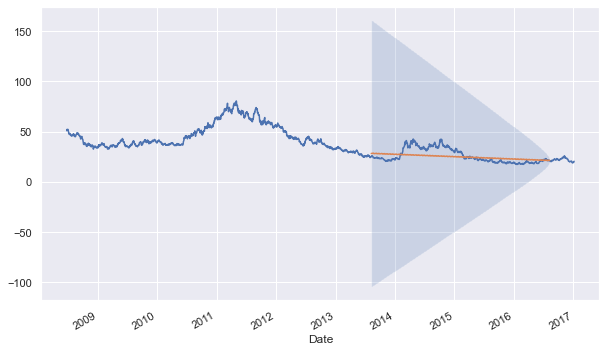

In [20]:
ar_p = ar_res.get_prediction('2016-08-08', '2013-08-08', dynamic=True)

fig, ax = plt.subplots(figsize=(10,6))
df.Close.plot(ax=ax)
ar_p.predicted_mean.plot(ax=ax)
ar_p_ci = ar_p.conf_int()
_=ax.fill_between(ar_p_ci.index, ar_p_ci['lower Close'], ar_p_ci['upper Close'], alpha=0.2)

# Model is perfectly predicting the Price using Kalman Filter as shown above by the Plot 